In [1]:
%cd ~/NetBeansProjects/ExpLosion/
from notebooks.common_imports import *
from gui.output_utils import *

def get_exp_ids(corpus='amazon_grouped-tagged'):
    # curve when varying k
    query_dict = {'expansions__decode_handler': 'SignifierSignifiedFeatureHandler'}
    return Experiment.objects.filter(**query_dict).values_list('id', flat=True)

/Volumes/LocalDataHD/m/mm/mmb28/NetBeansProjects/ExpLosion


ids are [25, 26, 27, 28, 29, 30, 31, 32, 33]
Accuracy has 4500 values
Composer has 4500 values
Algorithm has 4500 values
folds has 4500 values


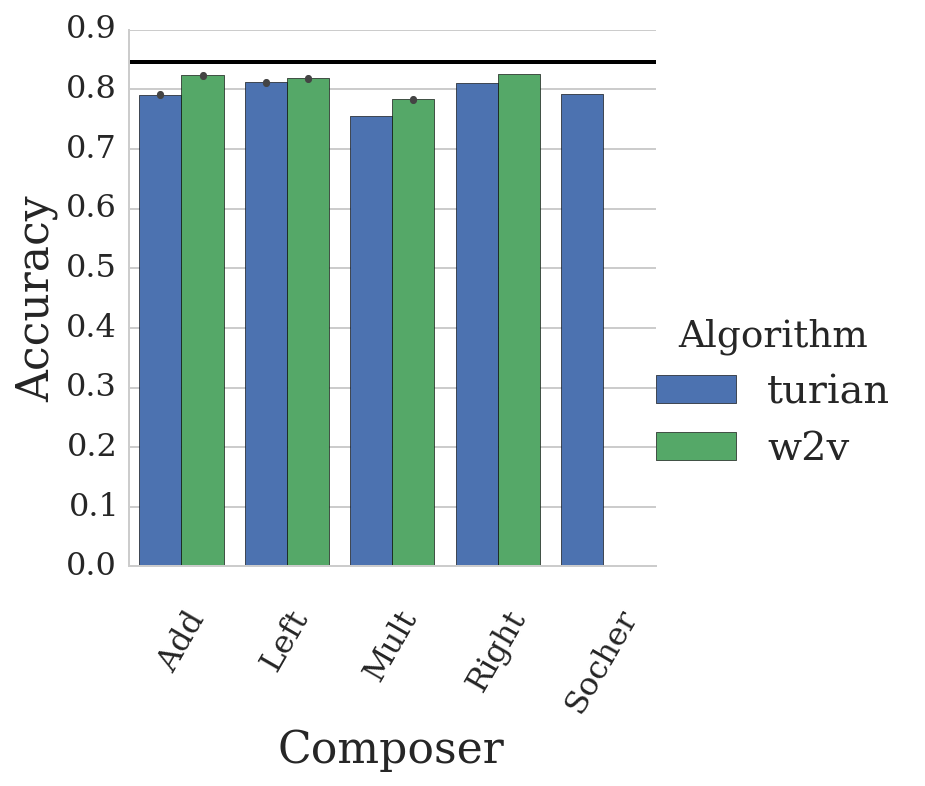

In [3]:
ids = get_exp_ids()
print('ids are', ids)
df = dataframe_from_exp_ids(ids, {'Algorithm':'expansions__vectors__algorithm', 
                                  'Composer':'expansions__vectors__composer'})
grid = sns.factorplot(hue='Algorithm', y='Accuracy', data=df, x='Composer',
                      kind='bar');
grid.set_xticklabels(rotation=60);
plt.axhline(nondistributional_baseline(), c='k')
plt.savefig('plot-w2v-turian-hybrid.pdf', format='pdf', dpi=300)